# Exploratory Data Analysis

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

%matplotlib inline

A description of the dataset lists the attributes and their descriptions:

### Dataset: Call Facts

##### Last Telephone Contact
* dialerLeadId: id of original Lead (numeric)
* dimAgentId: Id of who contacted the client (numeric)
* callDate: begining of contact (categorical: "1/4/2018  5:29:53 PM")
* callEndDate: ending of contact (categorical: "1/4/2018  5:30:11 PM")
* callType: type of call (categorical: "Inbound", "Outbound", "Manual Dial", "Outbound Agent Callback", "Voicemail")
* callTypeId: id of callType (numeric)
* dispoGroup: result of actual call (categorical: "Agent Call Back", "Do Not Call", "No Sale", "Non Workable", "Sale", "Still Workable", "System disposition", "Transfer Call")
* dispoDescription: description of dispoGroup (categorical: "Answering Machine", "Busye", ..., "Sale")
* callAttemptNumber: number of attempts (numeric)
* talkTimeSeconds: time of call in seconds (numeric)
* handleTimeSeconds: handled time in seconds (numeric)
* outboundCalls: number of outbounding calls (numeric)
* outboundCallbacks: number of outbounding callbacks (numeric)
* inboundCalls: number of inbounding calls (numeric)
* manualCalls: number of manual calls (numeric)
* inboundCallsHandled: number of inbounding calls (numeric)
* callSkill: unknown data (numeric)

##### Other Attributes
* Other attributes were not included in this analysis because they were meaningless or repetitive data.


### Dataset: Lead Facts

##### Client Attributes
* ageOnLeadGroup : age (categorical: "Under 20", "20 - 30", "31 - 40", "41 - 50", "51 - 60", "61 - 70", "71 - 80" , "81 - 90", "Over 90", "Undefined")
* gender (categorical: "F", "M", "U")

##### Lead Attributes
* dialerLeadId: id of Lead (categorical: "1/1/2018  12:47:18 AM")
* sourceSystem: id of system which provided the lead (categorical: "CUY-AMS", "PolicyFile", "tztLeads")
* leadDate: date of creation of lead (numeric)
* afid: unknown data (numeric)
* campaign id: id of campaign (numeric)
* originalContactType: type of contact (categorical: "IB", "OB", "Undefined")
* leadTypeId: id of type of lead (numeric)
* leadZip: zip of lead (numeric)
* leadCost: cost of lead (numeric)
* callCenterLeadCreatedReason: lead created reason (categorical: "Clone:OnCall", "Draft", ..., "Import")
* callCenterLeadCloneSourceId: lead clone source id (numeric)
* leadsReceived: number of leads received associated to client (numeric)
* leadsAccepted: number of accepted leads associated to client (numeric)
* leadsRejected: number of rejected leads associated to client (numeric)
* callCenterLeadsTotal: number of total leads associated to client (numeric)
* callCenterLeadEverContacted: number of total leads ever contacted associated to client (numeric)
* callCenterLeadEverSold: number of total leads ever sold associated to client (numeric)
* currentSkill: unknown data (numeric)
* originalSkill: unknown data (numeric)
* expirationInDays: expiration of lead (numeric)
* maxAttempts: maximum attempts to contact (numeric)
* dailyMaxAttempts: maximum attempts by day (numeric)
* leadType: type of lead (categorical: "Primary", "Recycle", "Shared")
* deliveryMethod: type of communication (categorical: "Data", "Voice")
* everCallback: unknown data (numeric)

##### Other Attributes
* Other attributes were not included in this analysis because they were meaningless or repetitive data.

## 1. Import Data

### 1.1 Call Facts dataset:

Import the dataset from excel file

In [2]:
xls = pd.ExcelFile('../data/data-assessment.xlsx')
calls_df = pd.read_excel(xls, 'Call Facts')

calls_df.head()

,dialerLeadId,dimAgentId,callDate,callType,callTypeId,dispoGroup,dispoDescription,callAttemptNumber,talkTimeSeconds,handleTimeSeconds,totalCalls,outboundCalls,outboundCallbacks,inboundCalls,manualCalls,inboundCallsHandled,callEndDate,callSkill
0,2311300,770,2018-01-04 17:29:53.000,Outbound,1,Still Workable,Answering Machine,3,12.0,18,1,1,0,0,0,0,2018-01-04 17:30:11.000,22.0
1,2311300,743,2018-01-02 18:11:25.180,Outbound,1,Still Workable,No Answer,2,NaN,25,1,1,0,0,0,0,2018-01-02 18:11:50.977,2.0
2,2311300,186,2018-01-02 11:47:30.707,Outbound,1,Still Workable,No Answer,1,35.0,41,1,1,0,0,0,0,2018-01-02 11:48:11.427,2.0
3,2311300,735,2018-01-15 13:56:32.673,Outbound,1,Still Workable,Answering Machine,5,21.0,28,1,1,0,0,0,0,2018-01-15 13:57:00.703,22.0
4,2311300,737,2018-01-15 12:10:38.683,Outbound,1,Still Workable,No Answer,4,9.0,15,1,1,0,0,0,0,2018-01-15 12:10:53.297,22.0


Remove meaningless columns

In [3]:
# Change complete date to day of week and month
calls_df['callDay'] = calls_df['callDate'].dt.day_name()
calls_df['callMonth'] = calls_df['callDate'].dt.month_name()

# Remove meaningless columns
calls_df.drop(['callType', 'totalCalls', 'callDate', 'callEndDate'], axis=1, inplace=True)

So we should expect 12 numeric and 4 categorical attributes.

In [4]:
calls_df.dtypes.groupby(calls_df.dtypes).size()

int64      10
float64     2
object      4
dtype: int64

In [5]:
dtypes = pd.DataFrame(calls_df.dtypes.rename('type')).reset_index().astype('str')

call_numeric = dtypes[(dtypes.type.isin(['int64', 'float64']))]['index'].values
call_categorical = dtypes[~(dtypes['index'].isin(call_numeric)) & (dtypes['index'] != 'predict')]['index'].values

print('Numeric:\n', call_numeric)
print('Categorical:\n', call_categorical)

Numeric:
 ['dialerLeadId' 'dimAgentId' 'callTypeId' 'callAttemptNumber'
 'talkTimeSeconds' 'handleTimeSeconds' 'outboundCalls' 'outboundCallbacks'
 'inboundCalls' 'manualCalls' 'inboundCallsHandled' 'callSkill']
Categorical:
 ['dispoGroup' 'dispoDescription' 'callDay' 'callMonth']


### 1.2 Lead Facts dataset:

Import the dataset from excel file

In [6]:
leads_df = pd.read_excel(xls, 'Lead Facts')
leads_df = leads_df[leads_df['callCenterLatestDispoGroup'].notna()]
leads_df.head()

,sourceSystem,dialerLeadId,leadDate,afid,campaign id,originalContactType,leadTypeId,leadZip,ageOnLeadGroup,gender,...,callCenterLatestDispoGroup,callCenterLatestDispoDescription,currentSkill,originalSkill,expirationInDays,maxAttempts,dailyMaxAttempts,leadType,deliveryMethod,everCallback
0,tztLeads,2311300,2018-01-01 00:47:18,363047.0,3.0,OB,15.0,97106.0,61 - 70,F,...,Still Workable,Answering Machine,22.0,2.0,30.0,12.0,5.0,Primary,Data,0.0
1,tztLeads,2311301,2018-01-01 00:53:06,363047.0,3.0,OB,15.0,47448.0,71 - 80,F,...,Transfer Call,Refer to other agent - Product,2.0,2.0,30.0,12.0,5.0,Primary,Data,0.0
2,tztLeads,2311310,2018-01-01 01:24:14,363047.0,3.0,OB,15.0,63114.0,61 - 70,F,...,Still Workable,No Answer,22.0,2.0,30.0,12.0,5.0,Primary,Data,1.0
3,tztLeads,2311317,2018-01-01 01:43:12,363047.0,3.0,OB,15.0,28216.0,61 - 70,F,...,No Sale,Can't Afford,2.0,2.0,30.0,12.0,5.0,Primary,Data,0.0
4,tztLeads,2311318,2018-01-01 01:44:45,363045.0,3.0,OB,15.0,77345.0,61 - 70,M,...,Still Workable,No Answer,22.0,2.0,30.0,12.0,5.0,Primary,Data,0.0


Remove meaningless columns

In [7]:
# Change complete date to day of week and month
leads_df['leadDay'] = leads_df['leadDate'].dt.day_name()
leads_df['leadMonth'] = leads_df['leadDate'].dt.month_name()

# Remove meaningless columns
leads_df.drop(['leadDate', 'callCenterDialAttempts', 'callCenterMinutesToFirstDialAttempt', 
               'callCenterLatestDispoDescription'], 
              axis=1, inplace=True)

So we should expect 19 numeric and 10 categorical attributes.

In [8]:
leads_df.dtypes.groupby(leads_df.dtypes).size()

int64       7
float64    12
object     10
dtype: int64

In [9]:
dtypes = pd.DataFrame(leads_df.dtypes.rename('type')).reset_index().astype('str')

lead_numeric = dtypes[(dtypes.type.isin(['int64', 'float64']))]['index'].values
lead_categorical = dtypes[~(dtypes['index'].isin(lead_numeric))]['index'].values

print('Numeric:\n', lead_numeric)
print('Categorical:\n', lead_categorical)

Numeric:
 ['dialerLeadId' 'afid' 'campaign id' 'leadTypeId' 'leadZip' 'leadCost'
 'callCenterLeadCloneSourceId' 'leadsReceived' 'leadsAccepted'
 'leadsRejected' 'callCenterLeadsTotal' 'callCenterLeadEverContacted'
 'callCenterLeadEverSold' 'currentSkill' 'originalSkill'
 'expirationInDays' 'maxAttempts' 'dailyMaxAttempts' 'everCallback']
Categorical:
 ['sourceSystem' 'originalContactType' 'ageOnLeadGroup' 'gender'
 'callCenterLeadCreatedReason' 'callCenterLatestDispoGroup' 'leadType'
 'deliveryMethod' 'leadDay' 'leadMonth']


Calculate current campaign success rates

In [10]:
coutcomes = leads_df.callCenterLatestDispoGroup.apply(lambda x: 1 if x == 'Sale' else 0)

print('Number of records:', len(leads_df))
print('Success Rate (Current Campaign):', coutcomes.sum() / len(leads_df))

Number of records: 27751
Success Rate (Current Campaign): 0.03916975964830096


3.9% response rate in the population

## 2. Analysis

### 2.1 Call Facts

### 2.1.1 Categorical Data Analysis

Any missing values?

In [11]:
calls_df[call_categorical].isnull().sum()

dispoGroup          0
dispoDescription    0
callDay             0
callMonth           0
dtype: int64

How are values distributed accross categorical attributes?

Support (callDay)

Tuesday      27655
Wednesday    27102
Monday       26118
Thursday     25909
Friday       25378
Name: callDay, dtype: int64 

Support (callMonth)

January     47437
February    43669
March       36322
April        4160
May           307
June          173
July           94
Name: callMonth, dtype: int64 



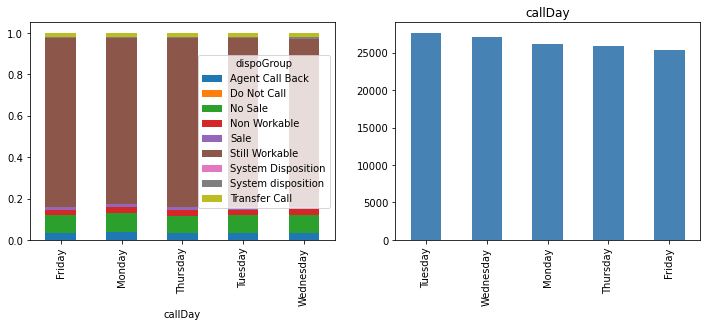

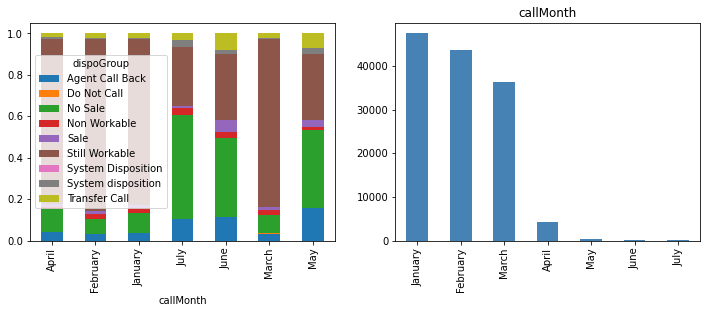

In [12]:
for attr in call_categorical:
    if attr in ['dispoGroup', 'dispoDescription']: continue
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
    outcome_counts = calls_df.groupby([attr, 'dispoGroup']).size().rename('count').reset_index()
    by_outcome = outcome_counts.pivot(columns='dispoGroup', values='count', index=attr)
    # Plot the proportions
    by_outcome.div(by_outcome.sum(1), axis=0).plot.bar(stacked=True, ax=ax1);
    # Plot the counts
    calls_df[attr].value_counts().plot.bar(ax=ax2, legend=False,color='steelblue');
    print('Support (%s)\n' % attr)
    print(calls_df[attr].value_counts(), '\n')
    plt.title(attr);

* Calls are uniform accross days of the week.
* Day of the week does not seem relevant to predict a sale.
* Fewer calls made in the second third of the year.

In [13]:
dayofweek_resp_rates = (calls_df.groupby('callDay').dispoGroup.value_counts() / calls_df.groupby('callDay').size()).rename('rate').reset_index()
dayofweek_pos_rates = dayofweek_resp_rates.query('dispoGroup == "Sale"')
dayofweek_pos_rates

,callDay,dispoGroup,rate
5,Friday,Sale,0.012767
14,Monday,Sale,0.013439
23,Thursday,Sale,0.011463
32,Tuesday,Sale,0.012511
41,Wednesday,Sale,0.012176


In [14]:
month_resp_rates = (calls_df.groupby('callMonth').dispoGroup.value_counts() / calls_df.groupby('callMonth').size()).rename('rate').reset_index()
month_pos_rates = month_resp_rates.query('dispoGroup == "Sale"')
month_pos_rates

,callMonth,dispoGroup,rate
4,April,Sale,0.012019
13,February,Sale,0.010946
22,January,Sale,0.013639
32,July,Sale,0.010638
37,June,Sale,0.057803
45,March,Sale,0.012444
53,May,Sale,0.032573


Even though months like May and June have fewer calls, they have a higher conversion rate.

### 2.1.2 Numerical Data Analysis

Missing values?

In [15]:
calls_df[call_numeric].isnull().sum()

dialerLeadId               0
dimAgentId                 0
callTypeId                 0
callAttemptNumber          0
talkTimeSeconds        24776
handleTimeSeconds          0
outboundCalls              0
outboundCallbacks          0
inboundCalls               0
manualCalls                0
inboundCallsHandled        0
callSkill                152
dtype: int64

Fill missing values

In [16]:
values = {'talkTimeSeconds': 0, 'callSkill': 0}
calls_df = calls_df.fillna(value=values)

Make histograms from attributes

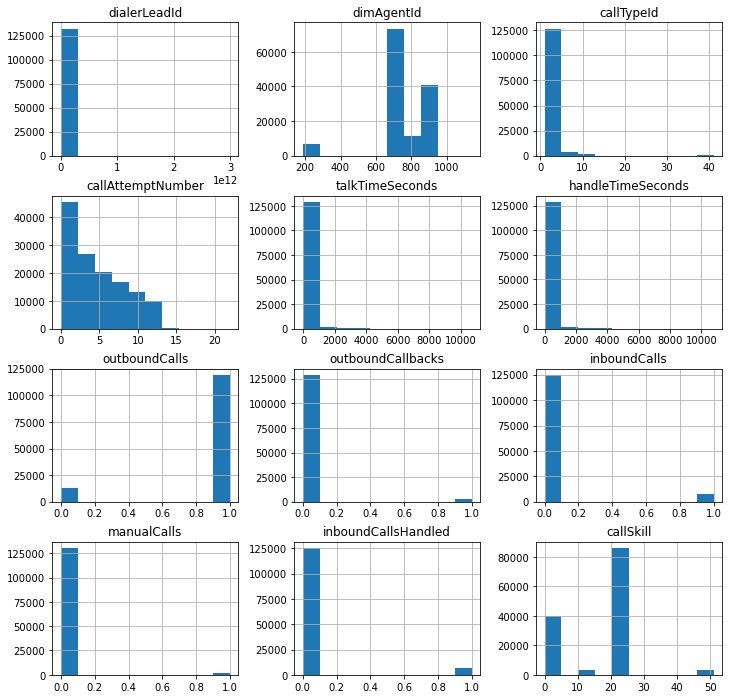

In [17]:
calls_df[call_numeric].hist(figsize=(12,12));

The fact that a majority of instances have same values in `outboundCallbacks`, `inboundCalls`, `manualCalls` and `inboundCallsHandled` are going to be problematic if we want to use these attributes as a model features.  Since so few instances have sparse values in these atrributes, we *could* remove them from the analysis and modelling process.

In [18]:
# Remove meaningless columns
excluded = ['outboundCallbacks', 'inboundCalls', 'manualCalls', 'inboundCallsHandled']
calls_df.drop(excluded, axis=1, inplace=True)

In [19]:
calls_df[np.setdiff1d(call_numeric,excluded)].describe()

,callAttemptNumber,callSkill,callTypeId,dialerLeadId,dimAgentId,handleTimeSeconds,outboundCalls,talkTimeSeconds
count,132162.000000,132162.000000,132162.000000,1.321620e+05,132162.000000,132162.000000,132162.000000,132162.000000
mean,4.781851,16.403966,1.432545,5.703516e+08,766.861700,137.097237,0.901538,95.764085
std,3.376044,10.601213,2.829132,4.125704e+10,157.876715,387.608740,0.297940,369.503638
min,0.000000,0.000000,1.000000,2.311300e+06,186.000000,0.000000,0.000000,-42.000000
25%,2.000000,2.000000,1.000000,2.587842e+06,735.000000,29.000000,1.000000,2.000000
50%,4.000000,22.000000,1.000000,2.922836e+06,743.000000,43.000000,1.000000,9.000000
75%,7.000000,22.000000,1.000000,3.148360e+06,913.000000,82.000000,1.000000,33.000000
max,22.000000,51.000000,41.000000,3.000000e+12,1142.000000,10779.000000,1.000000,10700.000000


### 2.2 Lead Facts

#### 2.2.1 Categorical Data Analysis

Any missing values?

In [20]:
leads_df[lead_categorical].isnull().sum()

sourceSystem                      0
originalContactType               0
ageOnLeadGroup                 3998
gender                         4984
callCenterLeadCreatedReason       0
callCenterLatestDispoGroup        0
leadType                          0
deliveryMethod                    0
leadDay                           0
leadMonth                         0
dtype: int64

Fill missing values

In [21]:
values = {'ageOnLeadGroup': 'Undefined', 'gender': 'U'}
leads_df = leads_df.fillna(value=values)

How are values distributed accross categorical attributes?

Support (sourceSystem)

tztLeads    21627
CUY-AMS      6124
Name: sourceSystem, dtype: int64 

Support (originalContactType)

OB    21972
IB     5779
Name: originalContactType, dtype: int64 

Support (ageOnLeadGroup)

61 - 70      16701
71 - 80       5879
Undefined     3998
81 - 90        830
Over 90        126
51 - 60        114
41 - 50         38
31 - 40         35
20 - 30         24
Under 20         6
Name: ageOnLeadGroup, dtype: int64 

Support (gender)

F    12259
M    10485
U     5005
0        2
Name: gender, dtype: int64 

Support (leadType)

Primary    27743
Shared         8
Name: leadType, dtype: int64 

Support (deliveryMethod)

Data     22020
Voice     5731
Name: deliveryMethod, dtype: int64 

Support (leadDay)

Wednesday    5723
Tuesday      5671
Thursday     5477
Monday       5269
Friday       4796
Saturday      449
Sunday        366
Name: leadDay, dtype: int64 

Support (leadMonth)

January     11040
February     8782
March        7929
Name: leadMonth, dtype: int64 



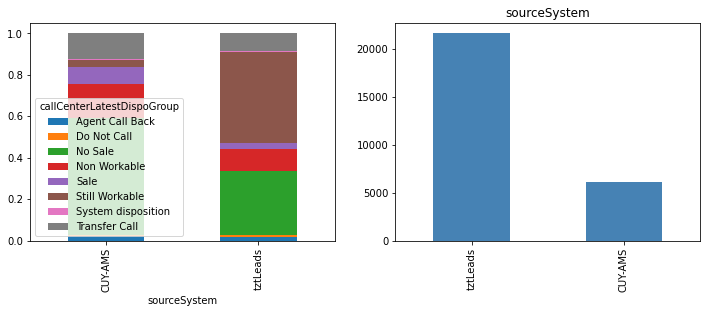

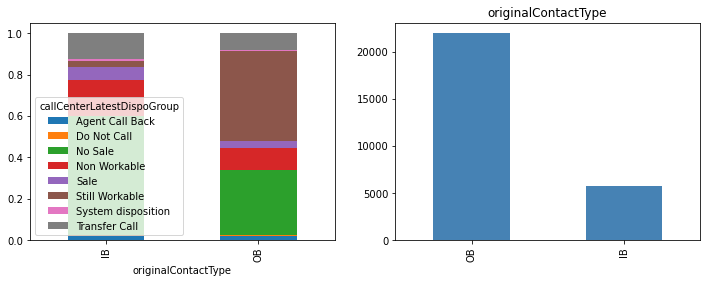

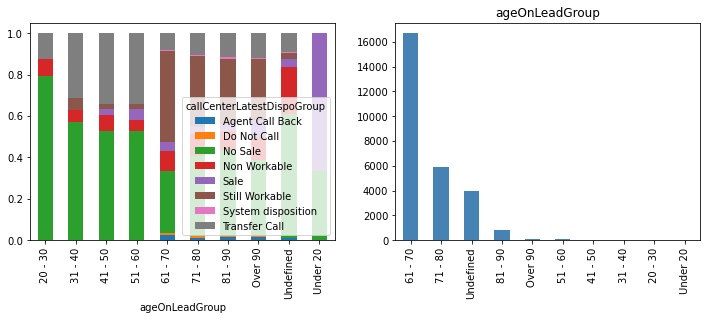

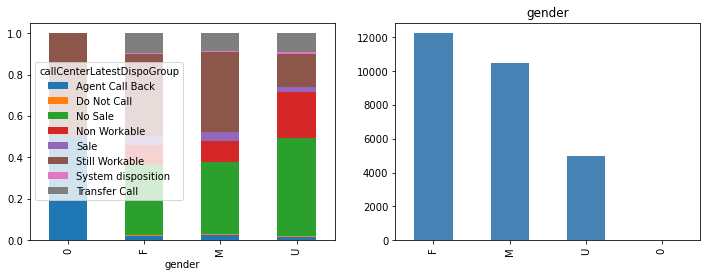

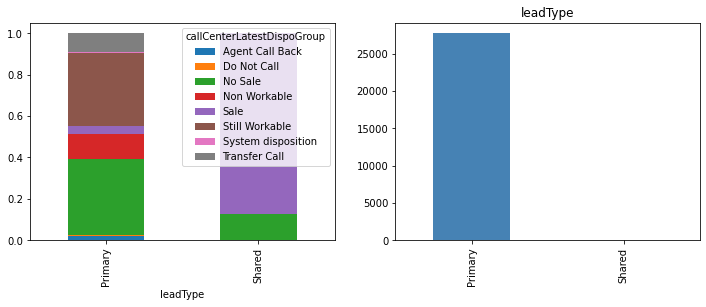

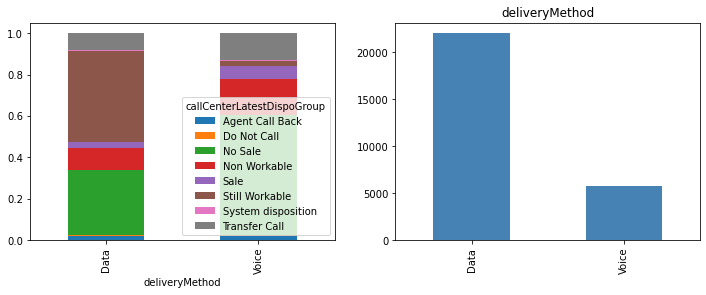

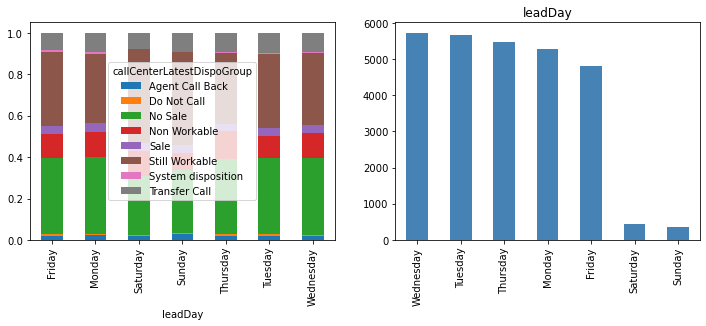

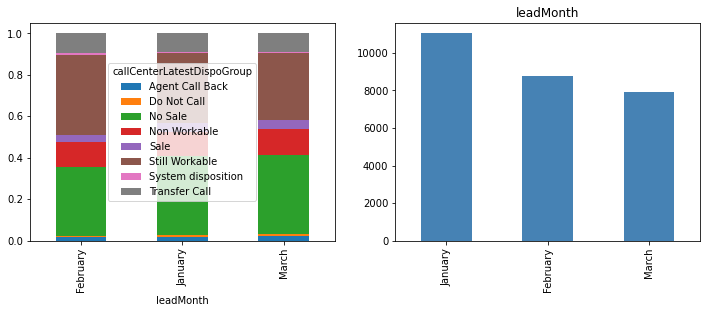

In [22]:
for attr in lead_categorical:
    if attr in ['callCenterLatestDispoGroup', 'callCenterLeadCreatedReason']: continue
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
    outcome_counts = leads_df.groupby([attr, 'callCenterLatestDispoGroup']).size().rename('count').reset_index()
    by_outcome = outcome_counts.pivot(columns='callCenterLatestDispoGroup', values='count', index=attr)
    # Plot the proportions
    by_outcome.div(by_outcome.sum(1), axis=0).plot.bar(stacked=True, ax=ax1);
    # Plot the counts
    leads_df[attr].value_counts().plot.bar(ax=ax2, legend=False,color='steelblue');
    print('Support (%s)\n' % attr)
    print(leads_df[attr].value_counts(), '\n')
    plt.title(attr);

* The source system with higher conversion rate is `CUY-AMY`. However, `tztLeads` provides a higher quantity of leads.
* IB contacts are more relevant than OB.
* Rate conversion in people under 20 is higher than other groups.
* Leads with delivery method Voice and lead type Shared can achive a sale easier than other groups.
* Calls are uniform accross days of weekdays.
* Day of the week does not seem relevant to predict a sale.

In [23]:
dayofweek_resp_rates = (leads_df.groupby('leadDay').callCenterLatestDispoGroup.value_counts() / leads_df.groupby('leadDay').size()).rename('rate').reset_index()
dayofweek_pos_rates = dayofweek_resp_rates.query('callCenterLatestDispoGroup == "Sale"')
dayofweek_pos_rates

,leadDay,callCenterLatestDispoGroup,rate
4,Friday,Sale,0.039616
12,Monday,Sale,0.044221
20,Saturday,Sale,0.042316
28,Sunday,Sale,0.040984
36,Thursday,Sale,0.033778
44,Tuesday,Sale,0.039852
52,Wednesday,Sale,0.038267


In [24]:
month_resp_rates = (leads_df.groupby('leadMonth').callCenterLatestDispoGroup.value_counts() / leads_df.groupby('leadMonth').size()).rename('rate').reset_index()
month_pos_rates = month_resp_rates.query('callCenterLatestDispoGroup == "Sale"')
month_pos_rates

,leadMonth,callCenterLatestDispoGroup,rate
4,February,Sale,0.034958
12,January,Sale,0.041576
20,March,Sale,0.040484


Month like February and March have a higher conversion rate.

#### 2.2.2 Numerical Data Analysis

Missing values?

In [25]:
leads_df[lead_numeric].isnull().sum()

dialerLeadId                       0
afid                             135
campaign id                     5240
leadTypeId                      9188
leadZip                         3268
leadCost                        9343
callCenterLeadCloneSourceId    27491
leadsReceived                      0
leadsAccepted                      0
leadsRejected                      0
callCenterLeadsTotal               0
callCenterLeadEverContacted        0
callCenterLeadEverSold             0
currentSkill                       0
originalSkill                   2098
expirationInDays                2140
maxAttempts                     2140
dailyMaxAttempts                2140
everCallback                     123
dtype: int64

Fill missing values

In [26]:
values = {'afid': 0, 'campaign id': 0, 'leadTypeId': 0, 'leadZip': 0, 'leadCost': 0, 'callCenterLeadCloneSourceId': 0, 
          'originalSkill': 0, 'expirationInDays': 30, 'maxAttempts': 10, 'dailyMaxAttempts': 2, 'everCallback': -1}
leads_df = leads_df.fillna(value=values)

Make histograms from attributes

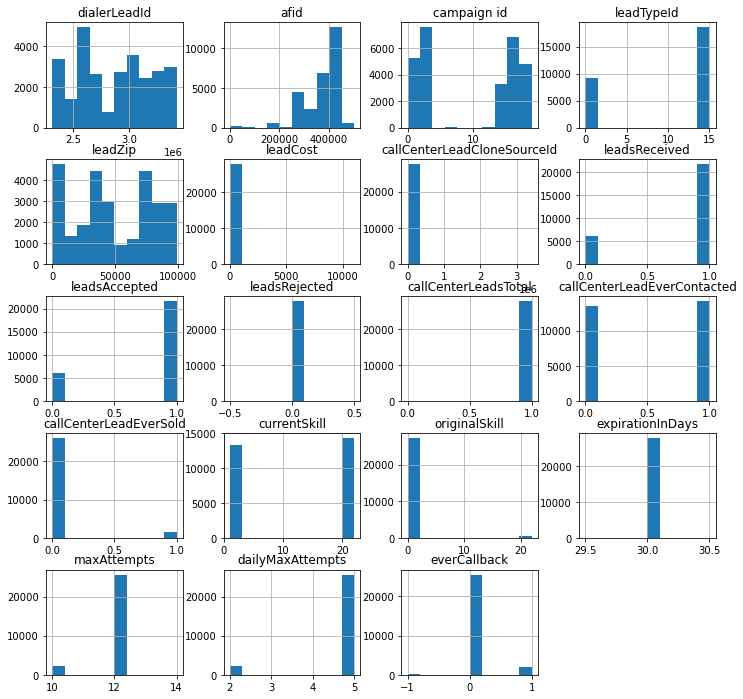

In [27]:
leads_df[lead_numeric].hist(figsize=(12,12));

The fact that a majority of instances have same values in `leadCost`, `callCenterLeadCloneSourceId`, `leadsRejected`, `callCenterLeadsTotal`, `callCenterLeadEverSold`, `originalSkill` and `expirationInDays` are going to be problematic if we want to use these attributes as a model features.  Since so few instances have sparse values in these atrributes, we *could* remove them from the analysis and modelling process.

In [28]:
# Remove meaningless columns
excluded = ['leadCost', 'callCenterLeadCloneSourceId', 'leadsRejected', 'callCenterLeadsTotal', 
            'originalSkill', 'expirationInDays']
leads_df.drop(excluded, axis=1, inplace=True)

In [29]:
leads_df[np.setdiff1d(lead_numeric,excluded)].describe()

,afid,callCenterLeadEverContacted,callCenterLeadEverSold,campaign id,currentSkill,dailyMaxAttempts,dialerLeadId,everCallback,leadTypeId,leadZip,leadsAccepted,leadsReceived,maxAttempts
count,27751.000000,27751.000000,27751.000000,27751.000000,27751.000000,27751.000000,2.775100e+04,27751.000000,27751.000000,27751.000000,27751.000000,27751.000000,27751.000000
mean,363290.070808,0.512198,0.059385,9.894346,12.153796,4.768008,2.862038e+06,0.069187,10.033512,48123.133689,0.779323,0.779323,11.845843
std,69489.964976,0.499860,0.236349,7.641264,10.160914,0.801360,3.342105e+05,0.270679,7.059130,31139.159099,0.414710,0.414710,0.533711
min,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2.311300e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,10.000000
25%,316693.000000,0.000000,0.000000,3.000000,2.000000,5.000000,2.583799e+06,0.000000,0.000000,23233.500000,1.000000,1.000000,12.000000
50%,363047.000000,1.000000,0.000000,15.000000,21.000000,5.000000,2.919029e+06,0.000000,15.000000,46394.000000,1.000000,1.000000,12.000000
75%,413352.000000,1.000000,0.000000,17.000000,22.000000,5.000000,3.137063e+06,0.000000,15.000000,77084.000000,1.000000,1.000000,12.000000
max,501287.000000,1.000000,1.000000,19.000000,22.000000,5.000000,3.426522e+06,1.000000,15.000000,98512.000000,1.000000,1.000000,14.000000


## 3. Dataset

### 3.1 Zero state and Predict column

Include **zero** state when client is not contacted yet and include **predict** column using next state in each case

In [30]:
# Get zero state of each lead lifecycle
call_first_attempt = calls_df.sort_values("callAttemptNumber").groupby(['dialerLeadId'], as_index=False).nth(0)
call_zero_attempt  = call_first_attempt.copy()

call_zero_attempt['dimAgentId'] = 0
call_zero_attempt['callTypeId'] = 0
call_zero_attempt['dispoGroup'] = 'Still Workable'
call_zero_attempt['dispoDescription'] = 'No Answer'
call_zero_attempt['callAttemptNumber'] = 0
call_zero_attempt['talkTimeSeconds'] = 0
call_zero_attempt['handleTimeSeconds'] = 0
call_zero_attempt['outboundCalls'] = 0
call_zero_attempt['callSkill'] = 0
calls_df['callDay'] = 'noday'
calls_df['callMonth'] = 'nomonth'

# Insert zero states in dataset
new_calls_df            = pd.concat([calls_df, call_zero_attempt]).reset_index(drop=True)

# Include predict column using the next state of each one
new_calls_df['predict'] = new_calls_df.sort_values("callAttemptNumber") \
                          .groupby(['dialerLeadId'], as_index=False)['dispoGroup'] \
                          .transform(lambda x: x.shift(-1))

# Remove last state of each lead lifecycle because we well predict it
call_last_attempt_idx   = new_calls_df.sort_values("callAttemptNumber", ascending=False) \
                          .groupby(['dialerLeadId'], as_index=False) \
                          .nth(0).index
new_calls_df            = new_calls_df.drop(call_last_attempt_idx).reset_index(drop=True)

### 3.1 Mix Datasets

Merge CallFacts and LeadFact datasets

In [31]:
result = pd.merge(new_calls_df, leads_df, on="dialerLeadId")
result.head()

,dialerLeadId,dimAgentId,callTypeId,dispoGroup,dispoDescription,callAttemptNumber,talkTimeSeconds,handleTimeSeconds,outboundCalls,callSkill,...,callCenterLeadEverSold,callCenterLatestDispoGroup,currentSkill,maxAttempts,dailyMaxAttempts,leadType,deliveryMethod,everCallback,leadDay,leadMonth
0,2311300,770,1,Still Workable,Answering Machine,3,12.0,18,1,22.0,...,0,Still Workable,22.0,12.0,5.0,Primary,Data,0.0,Monday,January
1,2311300,743,1,Still Workable,No Answer,2,0.0,25,1,2.0,...,0,Still Workable,22.0,12.0,5.0,Primary,Data,0.0,Monday,January
2,2311300,186,1,Still Workable,No Answer,1,35.0,41,1,2.0,...,0,Still Workable,22.0,12.0,5.0,Primary,Data,0.0,Monday,January
3,2311300,737,1,Still Workable,No Answer,4,9.0,15,1,22.0,...,0,Still Workable,22.0,12.0,5.0,Primary,Data,0.0,Monday,January
4,2311300,0,0,Still Workable,No Answer,0,0.0,0,0,0.0,...,0,Still Workable,22.0,12.0,5.0,Primary,Data,0.0,Monday,January


Remove repeated column

In [32]:
excluded = ['callCenterLeadCreatedReason', 'callCenterLatestDispoGroup']
result.drop(excluded, axis=1, inplace=True)

Missing values?

In [33]:
result.isnull().sum()

dialerLeadId                   0
dimAgentId                     0
callTypeId                     0
dispoGroup                     0
dispoDescription               0
callAttemptNumber              0
talkTimeSeconds                0
handleTimeSeconds              0
outboundCalls                  0
callSkill                      0
callDay                        0
callMonth                      0
predict                        0
sourceSystem                   0
afid                           0
campaign id                    0
originalContactType            0
leadTypeId                     0
leadZip                        0
ageOnLeadGroup                 0
gender                         0
leadsReceived                  0
leadsAccepted                  0
callCenterLeadEverContacted    0
callCenterLeadEverSold         0
currentSkill                   0
maxAttempts                    0
dailyMaxAttempts               0
leadType                       0
deliveryMethod                 0
everCallba

Convert categorical values to numbers

In [34]:
dtypes = pd.DataFrame(result.dtypes.rename('type')).reset_index().astype('str')
categories = dtypes[(dtypes['index'] != 'predict')]['index'].values
dataset    = pd.DataFrame()

for i, c in enumerate(categories):
    result[c] = result[c].astype('category')
    dataset['X'+str(i)] = result[c].cat.codes.astype('int64')
    
dataset['y'] = result['predict'].astype('category').cat.codes.astype('int64')

In [35]:
categories

array(['dialerLeadId', 'dimAgentId', 'callTypeId', 'dispoGroup',
       'dispoDescription', 'callAttemptNumber', 'talkTimeSeconds',
       'handleTimeSeconds', 'outboundCalls', 'callSkill', 'callDay',
       'callMonth', 'sourceSystem', 'afid', 'campaign id',
       'originalContactType', 'leadTypeId', 'leadZip', 'ageOnLeadGroup',
       'gender', 'leadsReceived', 'leadsAccepted',
       'callCenterLeadEverContacted', 'callCenterLeadEverSold',
       'currentSkill', 'maxAttempts', 'dailyMaxAttempts', 'leadType',
       'deliveryMethod', 'everCallback', 'leadDay', 'leadMonth'],
      dtype=object)

In [36]:
dataset.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,y
0,0,14,1,5,0,3,28,18,1,5,...,0,3,1,1,0,0,1,1,1,5
1,0,10,1,5,20,2,16,25,1,2,...,0,3,1,1,0,0,1,1,1,5
2,0,1,1,5,20,1,51,41,1,2,...,0,3,1,1,0,0,1,1,1,5
3,0,7,1,5,20,4,25,15,1,5,...,0,3,1,1,0,0,1,1,1,5
4,0,0,0,5,20,0,16,0,0,0,...,0,3,1,1,0,0,1,1,1,5


Create X and y arrays

In [37]:
groups_df = dataset.sort_values("X5").groupby(['X0'], as_index=False)

num_features = 31
max_length = 22
ds = 27751
X = np.zeros((ds, max_length, num_features))
y = np.zeros((ds))

for i, (name, group) in enumerate(groups_df):
    X[i, :group.values.shape[0]] = group.values[:,1:-1]
    y[i] = group.values[-1,-1]

In [38]:
result['predict'].astype('category').cat.categories

Index(['Agent Call Back', 'Do Not Call', 'No Sale', 'Non Workable', 'Sale',
       'Still Workable', 'System disposition', 'Transfer Call'],
      dtype='object')

### 3.3 Split

 Split the original dataset in training and testings datasets

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y, shuffle=True, test_size=.2)

In [40]:
print('Number of training records:', len(X_train))

cat = result['predict'].astype('category').cat.categories
value_counts = np.bincount(y_train.astype('int64'))
ii = np.nonzero(value_counts)[0]
print('\nTraining proportions:\n')
for i,v in zip(ii, value_counts[ii] / len(y_train)):
    print(cat[i], ": ", v)

Number of training records: 22200

Training proportions:

Agent Call Back :  0.01963963963963964
Do Not Call :  0.007117117117117117
No Sale :  0.3675675675675676
Non Workable :  0.11945945945945946
Sale :  0.03905405405405405
Still Workable :  0.34954954954954953
System disposition :  0.0061711711711711715
Transfer Call :  0.09144144144144144


### 3.4 Save

In [41]:
with open('../data/x_train.npy', 'wb') as f:
    np.save(f, X_train)

with open('../data/y_train.npy', 'wb') as f:
    np.save(f, y_train)

with open('../data/x_test.npy', 'wb') as f:
    np.save(f, X_test)

with open('../data/y_test.npy', 'wb') as f:
    np.save(f, y_test)